In [1]:
import tensorflow as tf

In [2]:
# Q1. Theory and Concepts:
# 1. Explain the concept of batch normailzation in the context of Artificial Nueral Networks.
    # Ans: Batch normalization in Artificial Neural Networks is a technique that normalizes the outputs of intermediate layers during training. 
        #  It helps stabilize and speed up training by reducing internal covariate shift, ensuring each layer's input has a consistent mean and variance.

# 2. Describe the benefits of batch normalization during training.'24_May_2023_Assign
    # Ans: It helps stabilize and accelerate the learning process by reducing internal covariate shift, making gradients more consistent. 
        #  This enables the use of higher learning rates, prevents vanishing/exploding gradients, and regularizes the model, leading to faster convergence and improved generalization performance.

# 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.
    # Ans: Batch normalization works by normalizing the outputs of a layer over mini-batches during training. 
        #  It calculates the mean and variance of each feature and scales/shifts the outputs using learnable parameters. 
        #  This stabilizes training, making gradients more consistent, and enables higher learning rates for faster convergence and better generalization.

Epoch 1/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2144 - accuracy: 0.9361 - val_loss: 0.1013 - val_accuracy: 0.9730
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0888 - accuracy: 0.9720 - val_loss: 0.0780 - val_accuracy: 0.9750
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0604 - accuracy: 0.9806 - val_loss: 0.0939 - val_accuracy: 0.9724
Epoch 4/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0456 - accuracy: 0.9849 - val_loss: 0.0729 - val_accuracy: 0.9772
Epoch 5/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0796 - val_accuracy: 0.9792
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0718 - val_accuracy

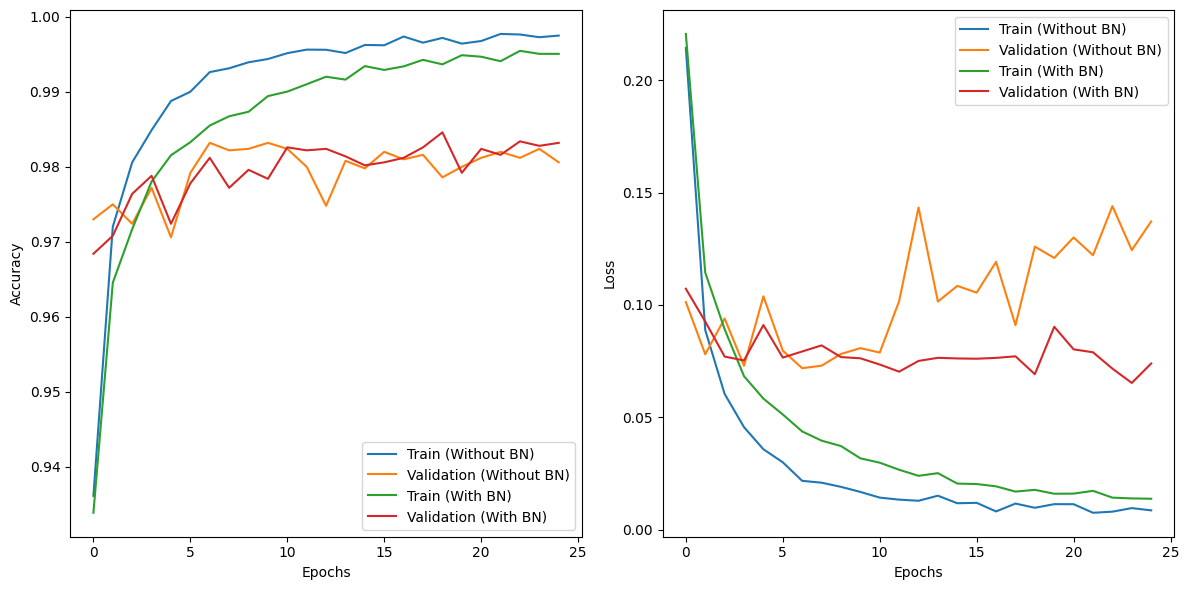

In [4]:
# Q2. Implementation:
# 1. Choose a dataset of your choice(eg., MNIST, CIFAR-10) and preprocess it.
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


# 2. Implementation a simple feedforward nueral network using any deep learning framework/lobrary(e.g., TensorFlow, Pytorch).
# Creating layers of ANN
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

model_Without_BN = tf.keras.models.Sequential()
model_Without_BN.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model_Without_BN.add(Dense(300, activation="relu", name="hiddenLayer1"))
model_Without_BN.add(Dense(100, activation="relu", name="hiddenLayer2"))
model_Without_BN.add(Dense(10, activation="softmax", name="outputLayer"))

model_Without_BN.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

# 3. Train the nueral network on the choosen dataset without using batch normalization.
# training
history_without_bn = model_Without_BN.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid), batch_size=32)

# 4. implement batch normalization layers in the nueral network and train the model again.
model_With_BN = tf.keras.models.Sequential()
model_With_BN.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model_With_BN.add(Dense(300, activation="relu", name="hiddenLayer1"))
model_With_BN.add(BatchNormalization()) 
model_With_BN.add(Dense(100, activation="relu", name="hiddenLayer2"))
model_With_BN.add(BatchNormalization()) 
model_With_BN.add(Dense(10, activation="softmax", name="outputLayer"))

model_With_BN.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

history_with_bn = model_With_BN.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid), batch_size=32)

# 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
# Plot accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_without_bn.history['accuracy'], label='Train (Without BN)')
plt.plot(history_without_bn.history['val_accuracy'], label='Validation (Without BN)')
plt.plot(history_with_bn.history['accuracy'], label='Train (With BN)')
plt.plot(history_with_bn.history['val_accuracy'], label='Validation (With BN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_without_bn.history['loss'], label='Train (Without BN)')
plt.plot(history_without_bn.history['val_loss'], label='Validation (Without BN)')
plt.plot(history_with_bn.history['loss'], label='Train (With BN)')
plt.plot(history_with_bn.history['val_loss'], label='Validation (With BN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.
    # Ans: Batch normalization has several positive impacts on the training process and neural network performance. 
        #  It stabilizes and accelerates training by reducing internal covariate shift, ensures more consistent gradients, 
        #  enables the use of higher learning rates, and prevents vanishing/exploding gradients. This leads to faster convergence 
        #  and improved generalization, enhancing the model's performance.


In [9]:
history_with_bn.history['val_accuracy'][-1]

0.9832000136375427

In [10]:
# Q3. Experimentation and Analysis:
# 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
# with 100 batch size instead of 32
model_With_BN_100 = tf.keras.models.Sequential()
model_With_BN_100.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model_With_BN_100.add(Dense(300, activation="relu", name="hiddenLayer1"))
model_With_BN_100.add(BatchNormalization()) 
model_With_BN_100.add(Dense(100, activation="relu", name="hiddenLayer2"))
model_With_BN_100.add(BatchNormalization()) 
model_With_BN_100.add(Dense(10, activation="softmax", name="outputLayer"))

model_With_BN_100.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

history_with_bn = model_With_BN_100.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid), batch_size=100)

# 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural network.
    # Ans: Advantages: Batch normalization stabilizes training by reducing internal covariate shift, allowing higher learning rates, 
            # and accelerating convergence. It also acts as a regularizer, improving generalization.
#          Limitations: It introduces extra computations during training, slightly slowing down training. 
            # In some cases, it may lead to overfitting when using large batch sizes or when the dataset is small.


Epoch 1/25
550/550 [==============================] - 8s 11ms/step - loss: 0.2090 - accuracy: 0.9389 - val_loss: 0.1094 - val_accuracy: 0.9684
Epoch 2/25
550/550 [==============================] - 7s 12ms/step - loss: 0.0837 - accuracy: 0.9751 - val_loss: 0.0830 - val_accuracy: 0.9754
Epoch 3/25
550/550 [==============================] - 6s 10ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0683 - val_accuracy: 0.9792
Epoch 4/25
550/550 [==============================] - 4s 8ms/step - loss: 0.0436 - accuracy: 0.9864 - val_loss: 0.0727 - val_accuracy: 0.9758
Epoch 5/25
550/550 [==============================] - 5s 10ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0778 - val_accuracy: 0.9790
Epoch 6/25
550/550 [==============================] - 5s 8ms/step - loss: 0.0302 - accuracy: 0.9896 - val_loss: 0.0799 - val_accuracy: 0.9766
Epoch 7/25
550/550 [==============================] - 5s 8ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0797 - val_accuracy: 0.9770
Ep

In [19]:
model_With_BN_100.history.history['val_accuracy'][-1]


0.9824000000953674

In [20]:
# With batch size of 1000
model_With_BN_1000 = tf.keras.models.Sequential()
model_With_BN_1000.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model_With_BN_1000.add(Dense(300, activation="relu", name="hiddenLayer1"))
model_With_BN_1000.add(BatchNormalization()) 
model_With_BN_1000.add(Dense(100, activation="relu", name="hiddenLayer2"))
model_With_BN_1000.add(BatchNormalization()) 
model_With_BN_1000.add(Dense(10, activation="softmax", name="outputLayer"))

model_With_BN_1000.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

history_with_bn_1000 = model_With_BN_1000.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid), batch_size=1000)

Epoch 1/25
55/55 [==============================] - 4s 33ms/step - loss: 0.4264 - accuracy: 0.8725 - val_loss: 0.9549 - val_accuracy: 0.8774
Epoch 2/25
55/55 [==============================] - 1s 27ms/step - loss: 0.1416 - accuracy: 0.9602 - val_loss: 0.6590 - val_accuracy: 0.9192
Epoch 3/25
55/55 [==============================] - 1s 27ms/step - loss: 0.0919 - accuracy: 0.9748 - val_loss: 0.4128 - val_accuracy: 0.9380
Epoch 4/25
55/55 [==============================] - 1s 26ms/step - loss: 0.0609 - accuracy: 0.9846 - val_loss: 0.2422 - val_accuracy: 0.9622
Epoch 5/25
55/55 [==============================] - 1s 24ms/step - loss: 0.0421 - accuracy: 0.9901 - val_loss: 0.1548 - val_accuracy: 0.9650
Epoch 6/25
55/55 [==============================] - 1s 25ms/step - loss: 0.0286 - accuracy: 0.9941 - val_loss: 0.0946 - val_accuracy: 0.9772
Epoch 7/25
55/55 [==============================] - 1s 24ms/step - loss: 0.0196 - accuracy: 0.9969 - val_loss: 0.0833 - val_accuracy: 0.9768
Epoch 8/25
55

In [24]:
model_With_BN_1000.history.history['val_accuracy'][-1]

0.9819999933242798

- Model with Batch Normalization and batch size of 32:  Validation accuracy is 0.9832000136375427
- Model with Batch Normalization and batch size of 100: Validation accuracy is 0.9824000000953674
- Model with Batch Normalization and batch size of 1000: Validation accuracy is 0.9819999933242798
#### So it says that increasing the batch size decreasing our model performance but it increases our computation time.